# Import Dataset

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [308]:
df = pd.read_csv("Sentiment1.csv", encoding='ISO-8859-1')

In [309]:
df.head()

,Date,Text,Username,Length_Text,Sentiment
0,Wed Dec 13 23:47:11 +0000 2023,@Hasbil_Lbs @aniesbaswedan gampang sih bikin v...,DzulfiqorParisi,254,Negative
1,Wed Dec 13 23:46:34 +0000 2023,"Lagi, lagi dan terus Tokoh Harapan yg dirinduk...",sumadiseloguno,222,Positive
2,Wed Dec 13 23:43:39 +0000 2023,Biarpun BuzzeRp dikerahkan utk trs bela junjun...,AlfathMelfas,281,Negative
3,Wed Dec 13 23:36:50 +0000 2023,Kagum dgn senyum pak Anies yg teteup tersunggi...,SBahriTweet,216,Positive
4,Wed Dec 13 23:36:04 +0000 2023,Gemoy sih tapiiii..udah TUAAAAA..????...jadi s...,samask_1,161,Neutral


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1336 non-null   object
 1   Text         1336 non-null   object
 2   Username     1336 non-null   object
 3   Length_Text  1336 non-null   int64 
 4   Sentiment    1336 non-null   object
dtypes: int64(1), object(4)
memory usage: 52.3+ KB


# Cleaning

In [311]:
# Kolom yang akan dibersihkan
kolom_teks = 'Text'

# Fungsi untuk membersihkan teks dari punctuation, angka, dan karakter tidak penting
def bersihkan_teks(full_text):
    full_text = re.sub(r'http\S+', '', str(full_text))
    teks_bersih = re.sub(r'[^a-zA-Z\s]', '', str(full_text))
    return teks_bersih

# Terapkan fungsi pembersihan pada kolom
df[kolom_teks] = df[kolom_teks].apply(bersihkan_teks)

In [312]:
df.head()

,Date,Text,Username,Length_Text,Sentiment
0,Wed Dec 13 23:47:11 +0000 2023,HasbilLbs aniesbaswedan gampang sih bikin vide...,DzulfiqorParisi,254,Negative
1,Wed Dec 13 23:46:34 +0000 2023,Lagi lagi dan terus Tokoh Harapan yg dirinduka...,sumadiseloguno,222,Positive
2,Wed Dec 13 23:43:39 +0000 2023,Biarpun BuzzeRp dikerahkan utk trs bela junjun...,AlfathMelfas,281,Negative
3,Wed Dec 13 23:36:50 +0000 2023,Kagum dgn senyum pak Anies yg teteup tersunggi...,SBahriTweet,216,Positive
4,Wed Dec 13 23:36:04 +0000 2023,Gemoy sih tapiiiiudah TUAAAAAjadi sering lupa ...,samask_1,161,Neutral


# Visualisasi

### Pie Chart

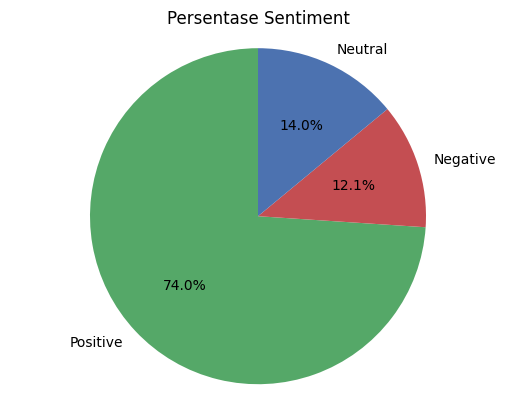

In [313]:
# Menghitung jumlah sentimen positive, negative, dan neutral
positive_count = df[df['Sentiment'] == 'Positive'].shape[0]
negative_count = df[df['Sentiment'] == 'Negative'].shape[0]
neutral_count = df[df['Sentiment'] == 'Neutral'].shape[0]

# Menyusun data sentimen dan label
sentimen = [positive_count, negative_count, neutral_count]
labels = ['Positive', 'Negative', 'Neutral']

# Menentukan warna untuk setiap sektor
colors = ['#55a868', '#c44e52', '#4c72b0']

# Membuat Pie Chart
plt.pie(sentimen, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Menambahkan judul
plt.title('Persentase Sentiment')

# Menampilkan Pie Chart
plt.axis('equal')
plt.show()

### Wordcloud

In [314]:
from wordcloud import WordCloud

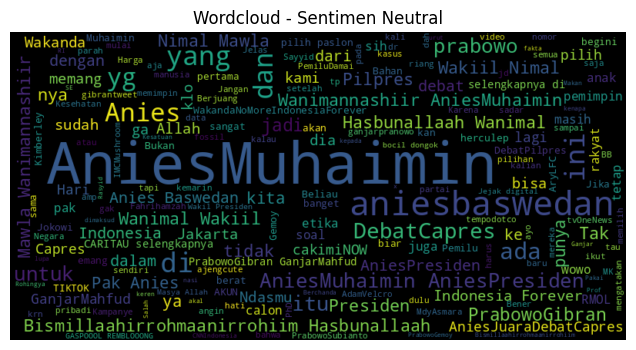

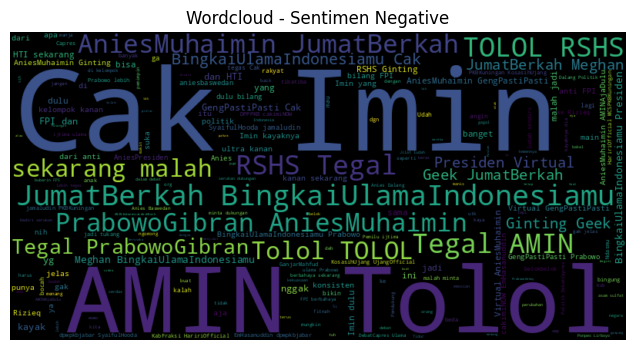

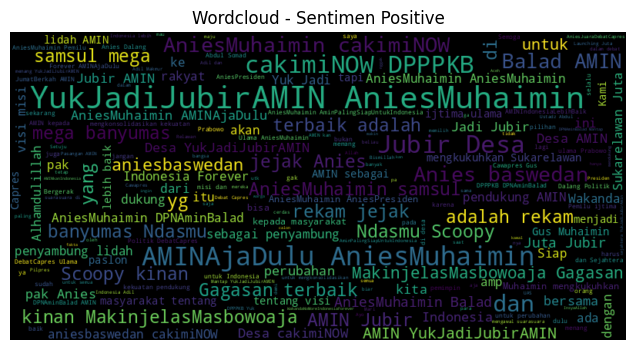

In [315]:
# Mengganti nilai NaN dengan string kosong ('') pada kolom "Text"
df['Text'] = df['Text'].fillna('')

# Membuat subset data untuk tiap kategori sentimen
df_neutral = df[df['Sentiment'] == 'Neutral']
df_negative = df[df['Sentiment'] == 'Negative']
df_positive = df[df['Sentiment'] == 'Positive']

# Menggabungkan semua kata dalam kolom "Text" untuk tiap kategori sentimen
text_neutral = ' '.join(df_neutral['Text'])
text_negative = ' '.join(df_negative['Text'])
text_positive = ' '.join(df_positive['Text'])

# Membuat objek WordCloud untuk tiap kategori sentimen
wordcloud_neutral = WordCloud(width=800, height=400).generate(text_neutral)
wordcloud_negative = WordCloud(width=800, height=400).generate(text_negative)
wordcloud_positive = WordCloud(width=800, height=400).generate(text_positive)

# Menampilkan wordcloud untuk tiap kategori sentimen secara terpisah
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Wordcloud - Sentimen Neutral')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Wordcloud - Sentimen Negative')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Wordcloud - Sentimen Positive')
plt.axis('off')
plt.show()

# Menyiapkan Data

In [316]:
COL = 'Text'

In [317]:
print(COL)
df.shape

Text


(1336, 5)

In [318]:
df.head()

,Date,Text,Username,Length_Text,Sentiment
0,Wed Dec 13 23:47:11 +0000 2023,HasbilLbs aniesbaswedan gampang sih bikin vide...,DzulfiqorParisi,254,Negative
1,Wed Dec 13 23:46:34 +0000 2023,Lagi lagi dan terus Tokoh Harapan yg dirinduka...,sumadiseloguno,222,Positive
2,Wed Dec 13 23:43:39 +0000 2023,Biarpun BuzzeRp dikerahkan utk trs bela junjun...,AlfathMelfas,281,Negative
3,Wed Dec 13 23:36:50 +0000 2023,Kagum dgn senyum pak Anies yg teteup tersunggi...,SBahriTweet,216,Positive
4,Wed Dec 13 23:36:04 +0000 2023,Gemoy sih tapiiiiudah TUAAAAAjadi sering lupa ...,samask_1,161,Neutral


In [319]:
# Membuat mapping untuk encoding
sentimen_mapping = {"Negative": -1, "Neutral": 0, "Positive": 1}

# Melakukan encoding pada kolom "Sentiment"
df["sentimen_encoded"] = df["Sentiment"].map(sentimen_mapping)

# TF-IDF

In [320]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [321]:
tfidf = TfidfVectorizer(min_df=3, max_df=0.5, ngram_range=(1, 1))
features = tfidf.fit_transform(df[COL].values)
dfuni = pd.DataFrame(features.todense(), columns=tfidf.get_feature_names_out())

In [322]:
print(dfuni.shape)

(1336, 975)


In [323]:
dfuni.head()

,aamiin,abdul,acara,aceh,ada,adalah,adamvelcro,adanya,adedhani,adem,...,wowo,ya,yaa,yakin,yang,yg,yuk,yukjadijubiramin,yurissasamosir,zainulmunas
0,0.0,0.0,0.0,0.0,0.000000,0.135483,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.135128,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.168504,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.225566,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.354678,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# Split Data

In [324]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree, metrics
from sklearn.metrics import classification_report

In [325]:
dfuni['y'] = df['sentimen_encoded']

In [326]:
X_train, X_test, y_train, y_test = train_test_split(dfuni.drop(['y'], axis=1), dfuni[['y']], test_size=0.30, random_state=555)

In [327]:
dfunitrain = X_train.join(y_train)
dfunitest = X_test.join(y_test)

In [328]:
X_unitrain = dfunitrain.drop(['y'], axis=1)
y_unitrain = dfunitrain['y']
X_unitest = dfunitest.drop(['y'], axis=1)
y_unitest = dfunitest['y']

# SVM

In [329]:
from sklearn import svm

In [330]:
clf = svm.SVC(max_iter=-1, C=1000, kernel='rbf')
clf.fit(X_unitrain, y_unitrain.values.ravel())
y_unipred = clf.predict(X_unitest)
print(clf.score(X_unitest, y_unitest))
print(metrics.classification_report(y_unitest, y_unipred, digits=3))

0.8678304239401496
              precision    recall  f1-score   support

          -1      1.000     0.782     0.878        55
           0      0.708     0.321     0.442        53
           1      0.862     0.983     0.919       293

    accuracy                          0.868       401
   macro avg      0.857     0.695     0.746       401
weighted avg      0.861     0.868     0.850       401

